In [1]:
from dataclasses import dataclass
from typing import NewType
from math import cos, sin, pi
import math

Punto= NewType("Punto", object)
Vector= NewType("Vector", object)

def iguales(a: float, b: float, eps=10**-3) -> bool:
    if type(a)==Vector and type(b)==Vector:
        return a==b
    else:
        #return math.isclose(a,b, abs_tol=eps)
        return abs(a- b)< eps

class Vector:
    def __init__(self, *args):
        self.coords= args
    def __len__(self):
        return len(self.coords)
    def __iter__(self):
        return iter(self.coords)
    def __repr__(self):
        return str(self.coords)
    def __eq__(self, other):
        if len(self)==len(other):
            return all( [iguales(a,b) for a,b in zip(self,other)] )
        else:
            raise ArithmeticError
    
class Punto(Vector):
    def __init__(self, *args):
        self.x, self.y= args[0], args[1]
        super().__init__(*args)
        
    def distancia(p1: Punto, p2: Punto) -> float: 
        """Regresa la distancia entre los puntos"""
        dx= p1.x - p2.x
        dy= p1.y - p2.y
        return math.hypot(dx, dy) # Saca la hipotenusa dados los catetos

    def transladar(self, dx: float, dy: float) -> Punto:
        self.x+= dx
        self.y+= dy
        return self

    def rotar(self, theta) -> Punto: 
        """Rota el punto theta grados"""
        theta= theta*pi/180
        x= self.x
        y= self.y
        self.x= x*cos(theta)-y*sin(theta)
        self.y= x*sin(theta)+y*cos(theta)
        return self
    
class Linea(Vector):
    def __init__(self, p1: Punto, p2: Punto):
        self.A= p1.y- p2.y
        self.B= p2.x- p1.x
        self.C= p2.y* p1.x - p1.y* p2.x
        super().__init__(self.A,self.B, self.C)

    def __repr__(self):
        return f"A:{self.A}, B:{self.B}, C:{self.C}"
    
    def simplificar(self):
        A, B, C= self.A, self.B, self.C
        if A:
            A,B,C= 1, B/A, C/A
        else:
            B,C= 1, C/B
        return A, B, C
    
    def __eq__(self, other): ## Tarea 2
        v1= Vector(*self.simplificar())
        v2= Vector(*other.simplificar())
        return v1==v2


class Segmento(Vector):
    def __init__(self, p1:Punto, p2:Punto):
        self.p1= p1
        self.p2= p2
        
    
    

In [2]:
p1= Punto(1,0)
p2= Punto(0,1)
p3= Punto(1,0)
p4= Punto(0.9999, 0.0001)

display( p1== p2 )
display( p1== p3 )
display( p1== p4 )

display(p2)

False

True

True

(0, 1)

In [77]:
## Linea Vertical
p1= Punto(2, 0)
p2= Punto(2, 3)

l1= Linea(p1,p2)
l1

A:-3, B:0, C:6

In [78]:
## Linea Vertical
p1= Punto(2, 0)
p2= Punto(2, 4)
l2= Linea(p1,p2)
l2

A:-4, B:0, C:8

In [79]:
## Comparación de Líneas
/display Linea(Punto(2,3),Punto(2,7))==Linea(Punto(2,0),Punto(2,-1)) 
/display Linea(Punto(2,3),Punto(4,3))==Linea(Punto(1,3),Punto(-7,3)) 
/display Linea(Punto(0,0),Punto(1,1))==Linea(Punto(2,2),Punto(11,11)) 
/display Linea(Punto(2,3),Punto(3,7))==Linea(Punto(2,0),Punto(2,-1)) 


True

True

True

False

In [80]:
## Tarea: Construir una función que compare adecuadamente
## si dos lineas son la misma
## revisar contra horizontal, vertical, diagonal

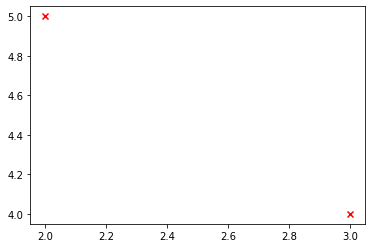

In [81]:
import matplotlib.pyplot as plt

p1= Punto(3,4)
p2= Punto(2,5)


#Patrón decorador
def acepta_listas(f):
    def inner(parametro, *args, **kwargs):
        if type(parametro)==list:
            for elemento in parametro:
                f(elemento,*args, **kwargs)
        else:
            f(parametro, *args, **kwargs)
    return inner

@acepta_listas
def graficar_puntos(p: Punto, *args, **kwargs):
    x= p.x
    y= p.y
    plt.scatter(x,y, *args, **kwargs)
    
graficar_puntos([p1,p2], color="r", marker="x")

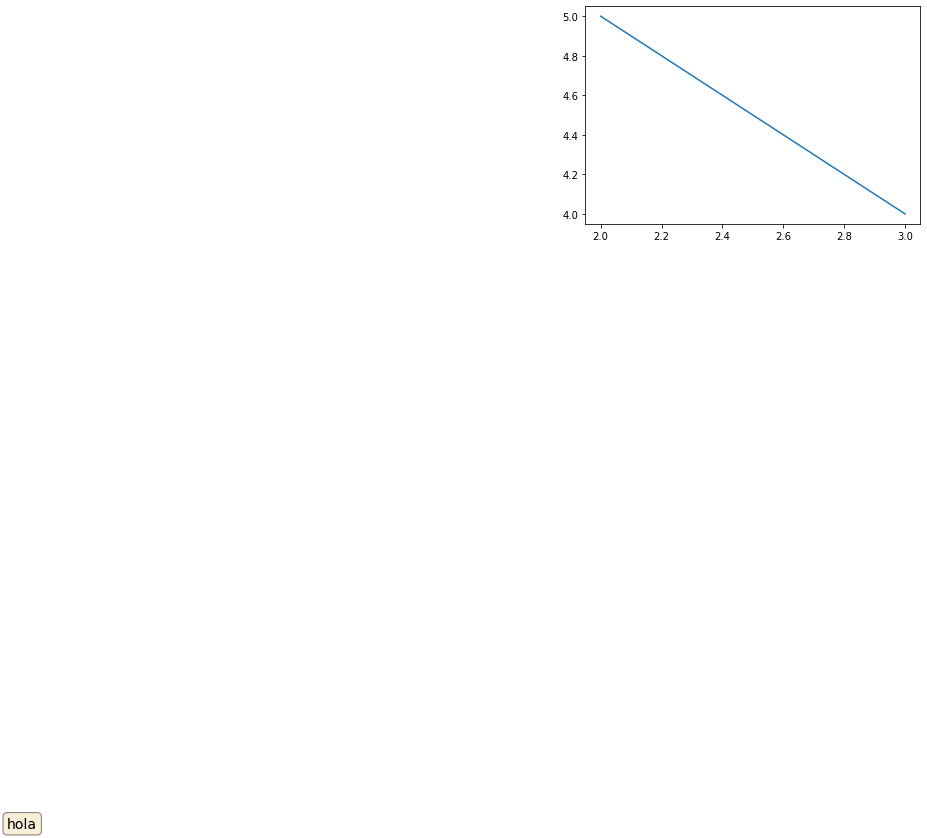

In [82]:
p1= Punto(3,4)
p2= Punto(2,5)

def graficar_segmento(p1:Punto, p2:Punto):
    plt.plot([p1.x, p2.x],[p1.y, p2.y])
    
graficar_segmento(p1,p2)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, "hola", fontsize=14, verticalalignment='top', bbox=props)
plt.show()

In [93]:
import numpy as np

v1=Vector(2.01,3)
v2=Vector(2,3)


In [94]:
iguales(v1,v2)

False